In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

In [3]:
def plot_classification(X: np.ndarray, 
                        y: np.ndarray, 
                        clf: object, 
                        title: str=None) -> None:
    """
    Function outputs plot for classificaiton results.
    Args:
        model: (object) fitted model with standard predict(X) public method
        X: (numpy.ndarray) array of input for the given model
        y: (numpy.ndarray) array of outputs matched to X matrix
        clf: (object) object of the fitted classifier
        title: (string) title of the plot
    """
    plt.figure(figsize=(9, 6))

    X1, X2 = np.meshgrid(np.arange(start = X[:, 0].min() - 0.2, stop = X[:, 0].max() + 0.2, step = 0.01),
                        np.arange(start = X[:, 1].min() - 0.2, stop = X[:, 1].max() + 0.2, step = 0.01))
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha = 0.3, cmap = ListedColormap(('blue', 'red')))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bo")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "ro")
    
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    plt.xlabel("X_1", fontsize=20)
    plt.ylabel("X_2", fontsize=20)
    plt.title(title, fontsize=22)
    plt.show()

# Klasyfikator SVM - Support Vector Machines

*W sklearn: SVC.* 
*Po polsku: maszyna wektorów nośnych.*

<img src="Grafika/svm_intro1.jpg" style="width: 200px">
<img src="Grafika/svm_intro2.jpg" style="width: 300px">
Źródło: https://www.safaribooksonline.com/library/view/python-deeper-insights/9781787128576/ch03s04.html

### Matematyka

Zajmujemy się klasyfikacją binarną, ale przyjmujemy konwencję $Y\in \{-1,1\}$. 

Rozważmy przypadek, gdy dane są liniowo separowalne.

$ \mathbf{w} \cdot \mathbf{x} = 0$ - równanie opisujące linię (hiperpłaszczyznę) rozdzielającą;

$
\begin{equation}
  \left.\begin{aligned}
  \mathbf{w} \cdot \mathbf{x} - b & = 1\\
  \mathbf{w} \cdot \mathbf{x} - b & = -1
\end{aligned}\right\} \text{- równania marginesów.}
\end{equation}
$

Zatem SVM szuka takiej płaszczyzny (parametrów $\mathbf{w}, b$), dla której:

$
\begin{equation}
  \begin{aligned}
  \mathbf{w} \cdot x_i - b & \geq 1, \ \ \text{ gdy } \ y_i = 1, \\
  \mathbf{w} \cdot x_i - b & \leq -1 \ \ \text{ gdy } \ y_i = -1,
\end{aligned}
\end{equation}
$

Co można zapisać w skrócie warunkiem:

$y_i ( \mathbf{w} \cdot x_i - b) \geq 1.$

A ponieważ odległość między marginesami (grubość płaszczyzny rozdzielającej klasy) wynosi $\frac{2}{\|\mathbf{w}\|}$, to ostatecznie uczenie klasyfikatora SVM można zdefiniować jako:

$$
\begin{equation}
  \begin{aligned}
  \text{zminimalizuj } & \ \ \ \|\mathbf{w}\|, \\ 
  \text{przy ograniczeniu: } & \ \ \ y_i ( \mathbf{w} \cdot x_i - b) \geq 1, \ \ \ i = 1, \ldots, n.
\end{aligned}
\end{equation}
$$

## Dane nieseparowalne 


<img src="Grafika/svm_nonlinear0.png" style="width: 500px">
Źródło: http://inspirehep.net/record/1265323/plots

Definiujemy zawiasową funkcję straty (*hinge loss*):

$\zeta _{i} = \max{(0, 1 - y_i ( \mathbf{w} \cdot x_i - b))}.$

Funkcja ta przyjmuje wartość $0$, gdy obserawcja $x_i$ leży po właściwej stronie hiperpłaszczyzny rozdzielającej, oraz jej wartość jest proporcjonalna do odległości do płaszczyzny w przypadku, gdy punkt leży po złej stronie.

Uczenie klasyfikatora definiujemy jako minimalizacja funkcji:

$$\bigg[\frac {1}{n}\sum\limits_{i=1}^{n}\max (0,1-y_{i}({\mathbf {w}}\cdot {\mathbf {x}}_{i}-b) )\bigg] + \lambda \| {\mathbf {w}}\| ^{2}.$$

Czyli jednocześnie maksymalizujemy odległość między marginesami (minimalizujemy $\| {\mathbf {w}}\|$) oraz minimalizujemy karę za punkty leżące po złej stronie. $\lambda$ - współczynnik ważący składowe opytmalizowanej funkcji.

Uwaga: tak samo jak w regresji logistycznej w sklearn pojawia się parametr `C` - odpowiada on wartości $\frac{1}{\lambda}$. Zatem: im większe `C`, tym mniejszą wagę przywiązujemy do szerokości marginesu, a większą do położenia punktów po właściwych stronach, czyli margines będzie węższy ale lepiej dopasowany.

<br>
**Uwaga 1**: Czy SVM da nam prawdopodobieństwo przynależenia obserwacji do klas (jak $\pi(x)$ w regresji logistycznej, czy empiryczny procent klas w liściu w drzewie decyzyjnym?

<br>

Z definicji nie. Ale w praktyce się to robi. Przyjmuje się, że $P(Y=1 \mid x) = \text{sigmoid}(x) = \frac{1}{1+e^{-d(x)}}$, gdzie $d(x)$ - odległość punktu $x$ od hiperpłaszczyzny rozdzielającej. W `sklearn` musimy ustawić w konstruktorze SVC parametr `probability=True`, jeśli chcemy żeby klasyfikator wyliczył te prawdopodobieństwa.

<br>
**Uwaga 2**: Czy SVM można zastosować do klasyfikacji wieloklasowej?

<br>

Tak jak w regresji logistycznej, klasyfikator jest zdefiniowany dla problemu klasyfikacji binarnej, ale w praktyce oczywiście jest na to sposób i to się robi. Wykorzystuje się schemat *one-vs-rest*: w przypadku $K$ klas uczymy model $K$ razy do problemów binarnych - $Y = k$ vs $Y \neq k$. Ostateczna predykcja, to klasa $c$, dla której prawdopodobieństwo $Y = c$ było największe.

<br>

**Uwaga 3**: Czy SVM wymaga jakiegoś przygotowania danych?

Tak - skalowanie.


## Kernel trick

#### Jak można wykorzystać SVM do klasyfikacji w przypadku danych nieliniowych.

<img src="Grafika/svm_nonlinear1.png" style="width: 400px">

Rozważmy rysunek B. W przedstawionych danych mamy dwie zmienne: $x_1, x_2$. Czy da się zastosować tutaj klasyfikator SVM?

<br>

<br>

Rozszerzmy ręcznie zbiór danych do następujących zmiennych:

$$x_1, x_2, x_1^2, x_2^2.$$

Gdybyśmy do takich zmiennych zastosowali SVM na tym zbiorze, to jak mogłaby wyglądać płaszczyzna rozdzielająca? Na przykład tak:

$$ 0 \cdot x_1 + 0 \cdot x_2 + a \cdot x_1^2 + b \cdot x_2^2 + c= 0.$$

Czyli $\mathbf{w} = [0, 0 , a, b]$.

Wszystko fajnie, ale skąd mamy wiedzieć jakie przekształcenia zmiennych dodać (np. na rysunku poniżej - pomijając już nawet fakt, że w rzeczywistych danych nawet nie będziemy w stanie spojrzeć na jakikolwiek rysunek...)? Możemy dodać dla każdej zmiennej dużo różnych transformacji, ale jeśli zmiennych pierwotnie będzie dużo, to z transfromacjami będzie ich $\text{dużo}^2$...

<img src="Grafika/svm_nonlinear2.png" style="width:300px">


Wróćmy do uczenia klasyfikatora, czyli rozwiązywania problemu optymalizacyjnego. 

Przyjmując oznaczenie $\zeta _{i}=\max (0,1-y_{i}(\mathbf{w}\cdot x_{i}-b))$, można go alternatywnie zapisać w postaci:

$$
\begin{equation}
  \begin{aligned}
  \text{zminimalizuj } & \ \ \ \frac {1}{n}\sum\limits_{i=1}^{n} \zeta_i + \lambda \|\mathbf{w}\|^2, \\ 
  \text{przy ograniczeniu: } & \ \ \ y_i ( \mathbf{w} \cdot x_i - b) \geq 1 - \zeta_i \ \text{oraz} \ \zeta_i \geq 0, \ \ \ i = 1, \ldots, n.
\end{aligned}
\end{equation}
$$


Okazuje się (matematyka wyższa...), że problem ten można sformułować równoważnie jako problem maksymalizacji funkcji:


$$f(c_1 \ldots c_n) = \sum\limits_{i=1}^n c_i - \frac{1}{2}\sum\limits_{i=1}^n \sum\limits_{j=1}^n y_i c_i (x_i\cdot x_j) y_j c_j,
$$

przy pewnych ograniczeniach, dla pewnych $c_1, \ldots, c_n$ (i tak się to w rzeczywistości odbywa). Widzimy zatem, że rozwiązanie zależy od iloczynów skalarnych obserwacji $x_i\cdot x_j$.

Rozważmy transformacje zmiennych i iloczyny sklarne. Przyjmijmy, że mamy dwie zmienne oryginalne: $x_1, x_2$. Załóżmy, że transformujemy dane do $x_1^2, x_1x_2, x_2x_1, x_2^2$. Czyli mamy przekształcenie $f(x_1,x_2) = (x_1^2, x_1x_2, x_2x_1, x_2^2)$. Weźmy przykładowo dwie obserwacje $a = (a_1, a_2), b = (b_1, b_2)$. Obserwacje te w nowej przestrzeni mają postać $f(a) = (a_1^2, a_1 a_2, a_2 a_1, a_2^2), \ f(b) = (b_1^2,b_1 b_2, b_2 b_1, b_2^2)$. Przeanalizujmy iloczyn skalarny:

$f(a) \cdot f(b) = a_1^2 \cdot b_1^2 + a_1a_2 \cdot b_1b_2 + a_2a_1 \cdot b_2b_1 + a_2^2 \cdot b_2^2 = (a_1b_1)^2 + 2a_1a_2b_1b_2 + (a_2b_2)^2$.

Teraz rozważmy funkcję $K(z) = z^2$ i spójrzmy na wynik działania tej funkcji na iloczynie $a \cdot b$:

$K(a \cdot b) = K(a_1 \cdot b_1 + a_2 \cdot b_2) = (a_1 \cdot b_1 + a_2 \cdot b_2)^2 = (a_1b_1)^2 + 2a_1a_2b_1b_2 + (a_2b_2)^2$.

Wniosek?

<br>

$f(a) \cdot f(b) = K(a \cdot b)$

<br>

Zatem, zamiast transformować zmienne, wystarczy użyć pewnego przekształcenia $K(x_i \cdot x_j)$ zamiast surowych iloczynów $x_i \cdot x_j$.

Dzięki temu:
- koszt obliczeniowy jest dużo mniejszy.
- pozbywamy się problemu szukania transformacji - w miejsce tego testujemy kilka przekształceń $K$.

$K$ jest zwane **jądrem** (funkcją jądrową, ang. *kernel*).


Jądra w sklearn:

http://scikit-learn.org/stable/modules/svm.html#svm-kernels

In [4]:
from sklearn.datasets import make_moons

In [5]:
dataset = make_moons(n_samples=1000, shuffle=True, noise=0.25)

In [6]:
X, y = dataset

In [7]:
X

array([[-0.72114745,  0.1093039 ],
       [-0.95090814,  0.09597902],
       [ 0.18840839, -0.25407341],
       ...,
       [-0.62253373,  1.46458132],
       [ 1.75236708,  0.02964581],
       [ 1.16078369, -0.49318159]])

In [8]:
y

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,

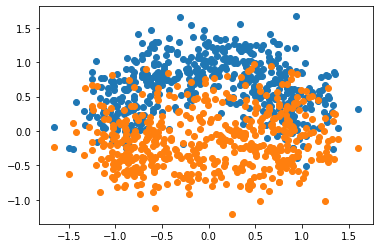

In [9]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0])
plt.scatter(X[:, 0][y==0], X[:, 1][y==1])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
from sklearn.svm import SVC

In [13]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

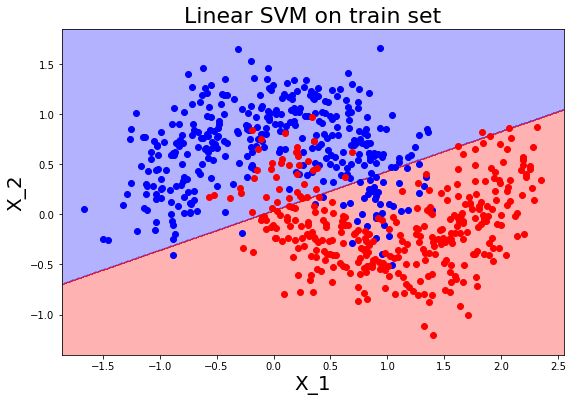

In [14]:
plot_classification(X_train, y_train, model, 'Linear SVM on train set') # widzimy złe dopasowanie czerwone po stronie niebieskiej i odwrotnie

In [15]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

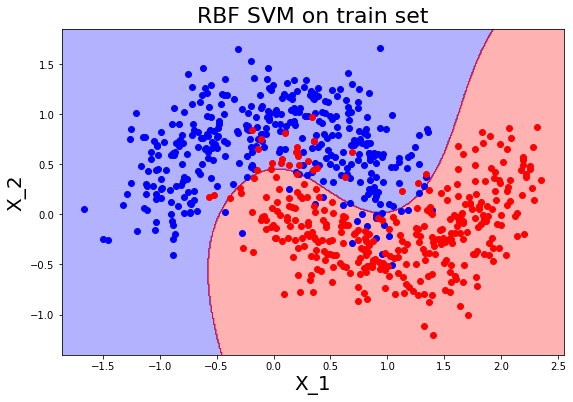

In [16]:
    plot_classification(X_train, y_train, model, 'RBF SVM on train set')

In [17]:
from sklearn.metrics import accuracy_score

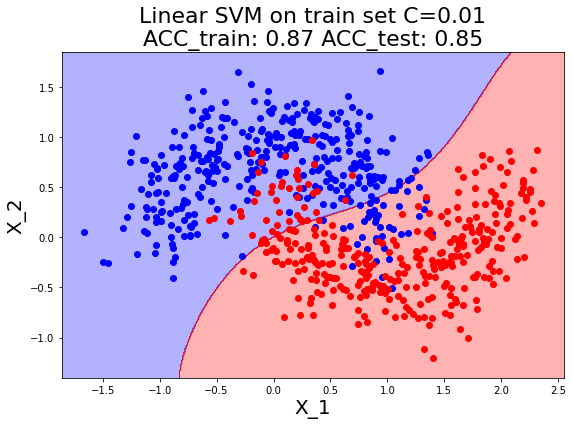

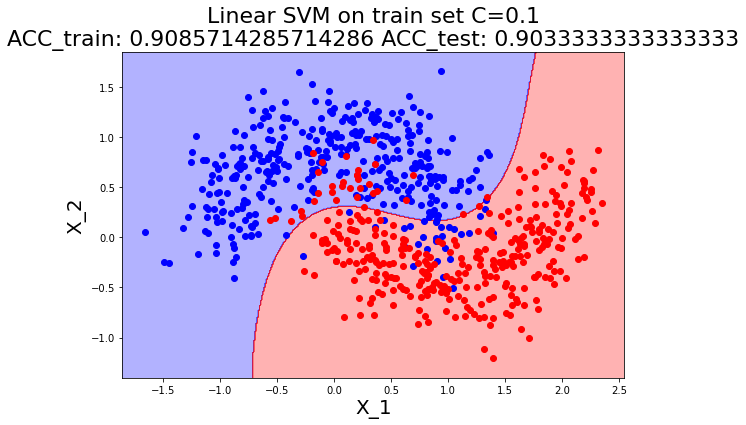

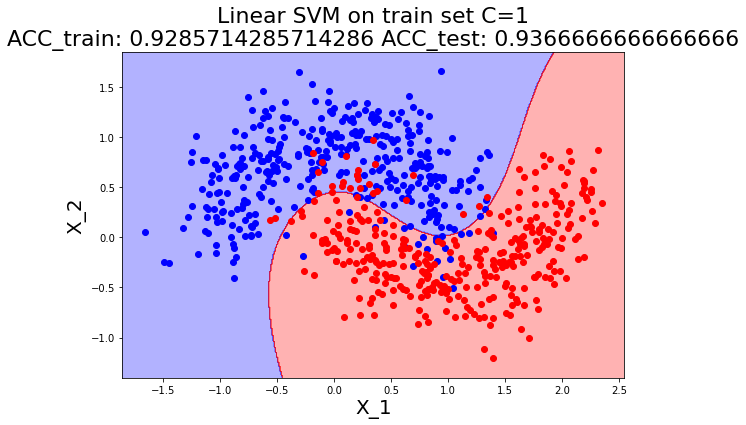

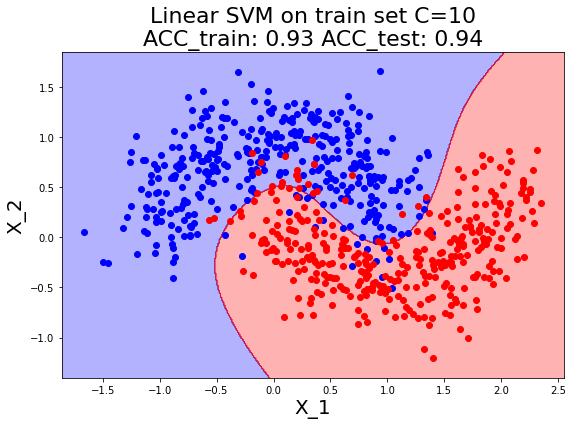

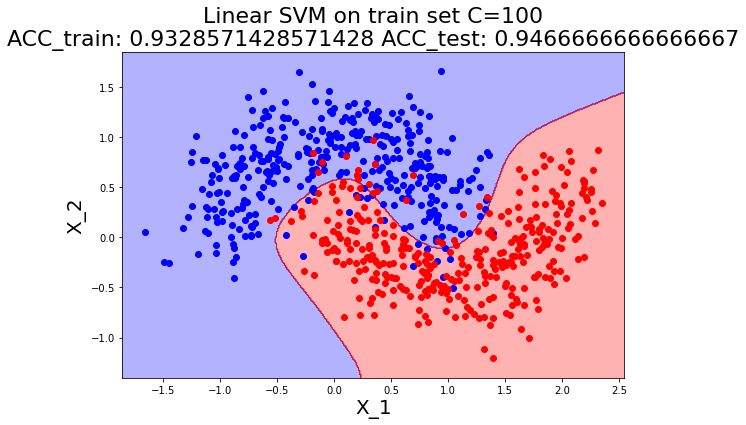

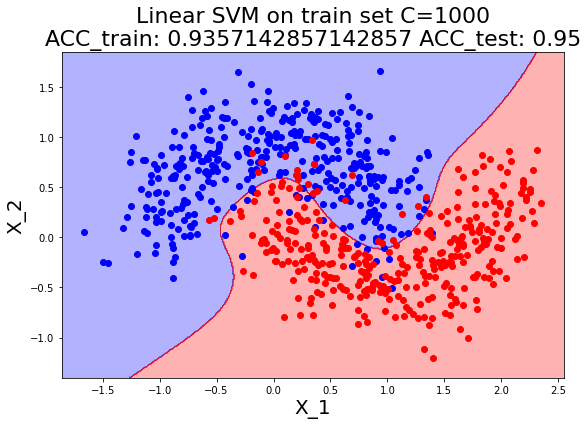

In [18]:
for c in [0.01, 0.1, 1, 10, 100, 1000]:
    model = SVC(kernel='rbf', C=c)
    model.fit(X_train, y_train)
    acc_train = accuracy_score(y_train, model.predict(X_train))
    acc_test = accuracy_score(y_test, model.predict(X_test))
    plot_classification(X_train, y_train, model, 'Linear SVM on train set C={}'
                        '\nACC_train: {} ACC_test: {}'.format(c, acc_train, acc_test))

    # wybieramy model który jest prostszy mniejsza wartość c bo maja ogolnie bardzo dobre wyniki 

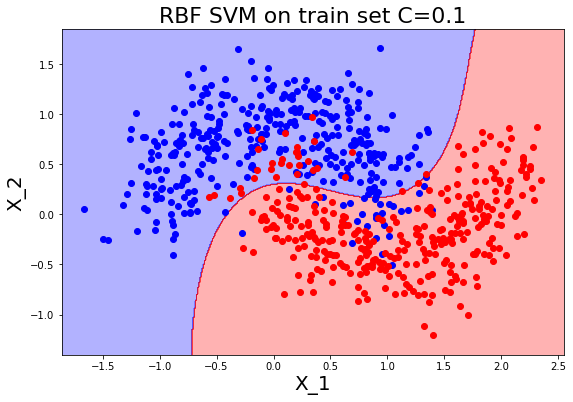

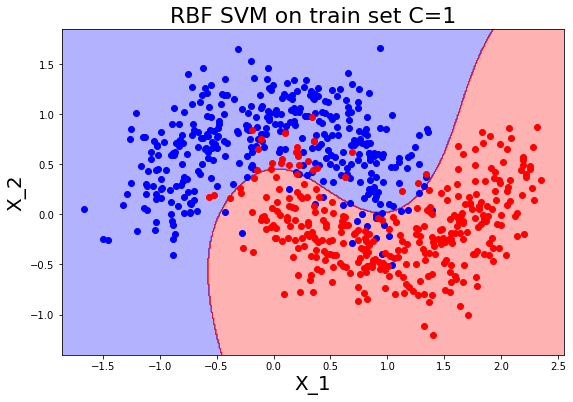

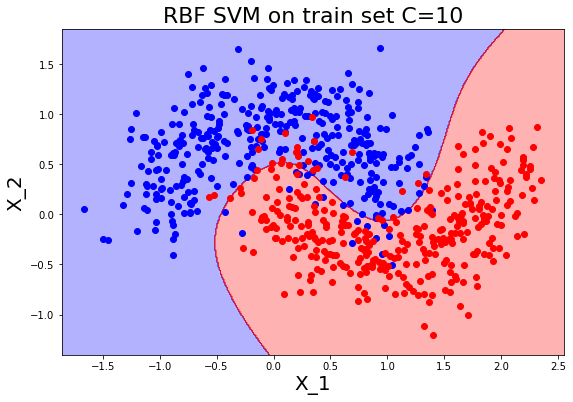

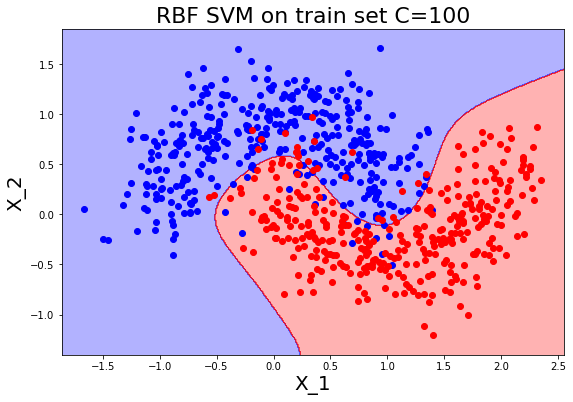

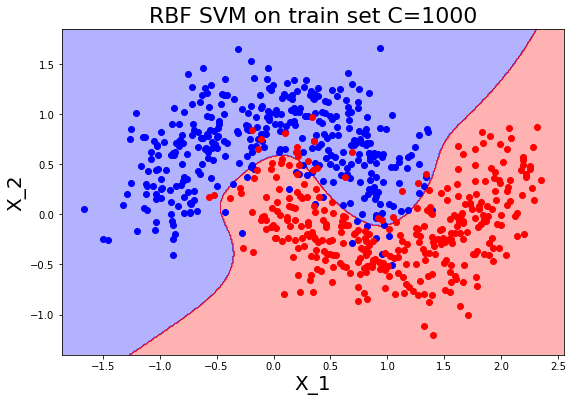

In [19]:
for c in [0.1, 1, 10, 100, 1000]:
    model = SVC(kernel='rbf', C=c)
    model.fit(X_train, y_train)
    plot_classification(X_train, y_train, model, 'RBF SVM on train set C={}'.format(c))

## Co SVM ma wspólnego z regresją logistyczną?

### Reguła decyzyjna w SVM:

$
\begin{equation}
  \begin{aligned}
  \hat{y_i} =  & \ \ \ \ 1, \ \ \text{ gdy }\mathbf{w} \cdot x_i  \geq 0, \\
  \hat{y_i} = & - 1, \ \ \text{ gdy }\mathbf{w} \cdot x_i  < 0.
\end{aligned}
\end{equation}
$


### Reguła decyzyjna w regresji logistycznej

$
\begin{equation}
  \begin{aligned}
  \hat{y_i} =  & \ \ \ \ 1, \ \ \text{ gdy }\frac{1}{1+e^{-\beta x_i}} \geq 0.5, \\
  \hat{y_i} = & - 1, \ \ \text{ gdy } \frac{1}{1+e^{-\beta x_i}} < 0.5,
\end{aligned}
\end{equation}
$

Jest ona równoważna regule:

$
\begin{equation}
  \begin{aligned}
  \hat{y_i} =  & \ \ \ \ 1, \ \ \text{ gdy } \beta x_i \geq 0, \\
  \hat{y_i} = & - 1, \ \ \text{ gdy } \beta x_i < 0.
\end{aligned}
\end{equation}
$

Czyli oba klasyfikatory mają identyczną postać reguły decyzyjnej: __liniową__.

Klasyfikatory o takiej postaci reguły decyzyjnej nazywają się klasyfikatorami liniowymi. Różnią się one sposobem wyznaczania hiperpłaszczyzny (np. prostej w przypadku 2D) rozdzielającej.

Uwaga: pomimo tego, że są to klasyfikatory liniowe, to można objąć nimi nieliniowość (transformacje zmiennych, czy kernel trick w svm).

# Lasy losowe

Wyobraźmy sobie, że mamy 100 klasyfikatorów i każdy z nich potrafi przewidywać $Y$ ze skutecznością $70\%$. Pytanie: jaką skuteczność będzie miała procedura klasyfikacyjna polegająca na dokonaniu predykcji każdym klasyfikatorem, a następnie podjęcie ostatecznej decyzji demokratycznie - czyli finalna decyzja to klasa dominująca wśród predykcji tych stu klasyfikatorów?

Jeżeli każdy klasyfikator ma skuteczność $70\%$, to średnio 70 ze 100 klasyfikatorów podejmie prawidłową decyzję. Jakie jest prawdopodobieństwo, że więcej niż 50 się pomyli? 

Bardzo małe... Zatem mamy doskonałą metodę klasyfikacji: nauczmy dużo modeli i klasyfikujmy demokratycznie.

Zatem po co ogóle uczyć się uczenia maszynowego, skoro możemy załatwić wszystko w ten prosty sposób?

<br>

<br>


Po to, bo jest jeden haczyk: **niezależność**...

Tak pięknie byłoby, gdyby te wszystkie klasyfikatory były niezależne. A nie są... Rozważmy sytuację, w które nauczyliśmy dwa modele: regresję logistyczną i SVM. Na czym polega zależność między tymi klasyfikatorami?

1. Oba klasyfikatory uczone są na tych samych zmiennych - zatem wykryją podobne zależności w danych, co przekłada się na podobieństwo predykcji.

2. Oba klasyfikatory są nauczone na tych samych obserwacjach.

Ponadto w tym konkretnym przypadku oba klasyfikatory są to klasyfikatory liniowe, zatem podejmują decyzję na podstawie płaszczyzny rozdzielającej. Te płaszczyzny mogą być bardzo podobne... A nawet jeśli nie są bardzo podobne, to i tak predykcje obu klasyfikatorów w praktyce będą silnie skorelowane, tzn. oba klasyfikatory będą dawały bardzo podobne predykcje...

Co możemy na to poradzić?

- każdy klasyfikator uczyć na innych zmiennych -> w praktyce losowe podzbiory, 
- każdy klasyfikator uczyć na innym podzbiorze obserwacji (w praktyce ma to mniejsze znaczenie).

W obu przypadkach pojedyncze klasyfikatory będą słabsze (bo wykorzystują mniej informacji), ale globalnie to pomoże!

Czy dwa powyższe zabiegi zapewniają niezależność klasyfikacji między poszczególnymi klasyfikatorami?

Nie, bo:
- nawet jak różne klasyfikatory uczymy na różnych zmiennych, to te zmienne będą z reguły zależne. Do tego w praktyce i tak nie jesteśmy w stanie nauczyć poszczególnych modeli na rozłącznych zbiorach zmiennych, bo musielibyśmy mieć tych zmiennych bardzo dużo (no chyba, że w każdym modelu wykorzystamy bardzo mało zmiennych, ale wtedy te modele będą słabe),
- nawet jak uczymy na różnych obserwacjach, to i tak w tych obserwacjach będą ukryte te same wzorce, które będą wykrywały modele.


### Lasy losowe - komitet drzew uczonych na różnych podzbiorach zmiennych i (ewentualnie) obserwacji.

Na marginesie: ciekawostką jest, że w praktyce przyjęło się, że mówiąc "lasy losowe" mamy na myśli **jeden** klasyfikator, czyli tak naprawdę "LAS losowy".

W sklearn las losowy zdefiniowany jest trochę inaczej:

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
model = RandomForestClassifier(n_estimators=50)

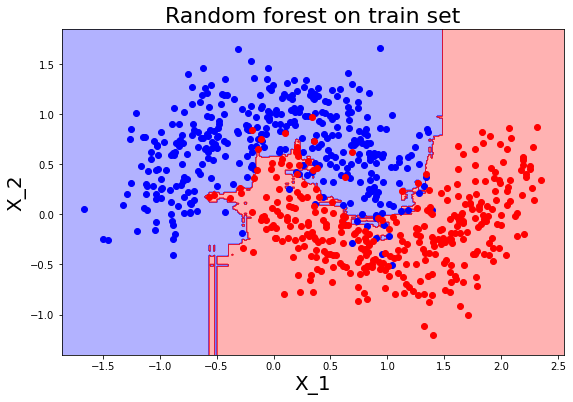

In [22]:
model.fit(X_train, y_train)
plot_classification(X_train, y_train, model, 'Random forest on train set')

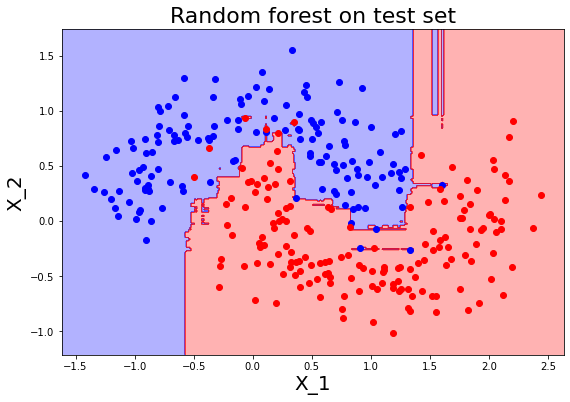

In [23]:
model.fit(X_test, y_test)
plot_classification(X_test, y_test, model, 'Random forest on test set')

In [24]:
acc_train_list = []
acc_test_list = []
for trees in range(1, 100, 2):
    print(trees)
    model = RandomForestClassifier(n_estimators=trees,
                                   max_depth=7,
                                   min_samples_leaf=5,
                                bootstrap=True, 
                                  max_features=2)
    model.fit(X_train, y_train)
    acc_train_list.append(accuracy_score(y_train, model.predict(X_train)))
    acc_test_list.append(accuracy_score(y_test, model.predict(X_test)))

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99


Text(0, 0.5, 'Accuracy')

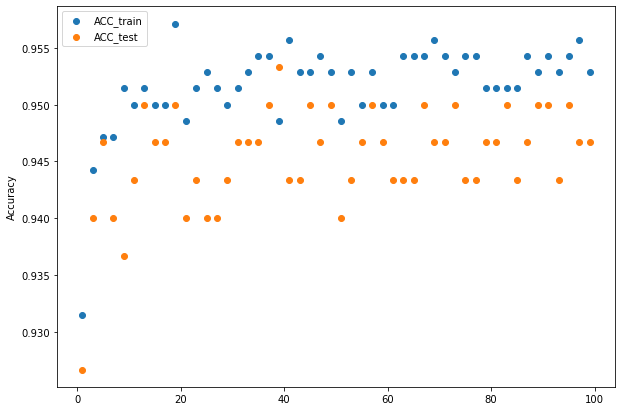

In [25]:
plt.figure(figsize=(10, 7))
plt.scatter(range(1, 100, 2), acc_train_list, label='ACC_train')
plt.scatter(range(1, 100, 2), acc_test_list, label='ACC_test')
plt.legend()
plt.ylabel('Accuracy')

Zwiększenie złożoności Lasu Losowego (poprzez liczbę drzew) nie prowadzi do przeuczenia! Błąd na zbiorze testowym dla odpowiedniej liczności drzew przestaje rosnąć i nie spada.

Istostości zmiennych dla klasyfikatora RandomForest mogą reprezentować zależności nieliniowe między zmiennymi objaśniającymy a objaśnianą(y). W przeciwieństwie do modeli liniowych, które w wagach przechowują "istotności" zmiennych liniowe.

#### Zadanie

Zrealizować przy użyciu tej klasy las losowy o nominalnej definicji:
- każde drzewo uczone jest na losowym podzbiorze zmiennych (np połowie),
- każde drzewo uczone jest na losowym podzbiorze obserwacji (np. połowie),
- obserwacje losowane są bez powtórzeń.

In [26]:
from sklearn.ensemble import BaggingClassifier

In [27]:
bagging = BaggingClassifier(base_estimator=SVC(kernel='rbf'),
                            n_estimators=20,
                            max_features=0.5,
                            max_samples=0.7,
                            bootstrap=True)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(), max_features=0.5, max_samples=0.7,
                  n_estimators=20)

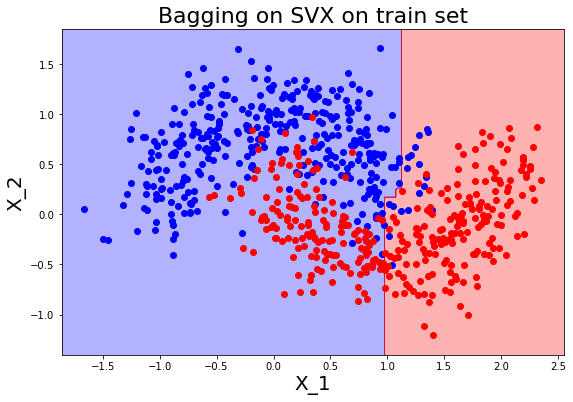

In [28]:
plot_classification(X_train, y_train, bagging, 'Bagging on SVX on train set')

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

random_forest = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7, min_samples_leaf=5),
                            n_estimators=20,
                            max_features=0.5,
                            max_samples=0.7,
                            bootstrap=True)
random_forest.fit(X_train, y_train)

plot_classification(X_train, y_train, random_forest, 'Random Forest on SVX on train set')

NameError: name 'DecisionTreeClassifier' is not defined

# Podejścia bezmodelowe do klasyfikacji

## Metoda K Najbliższych sąsiadów (KNN)

<img src="https://i.pinimg.com/originals/65/36/b9/6536b9a63fc427e0fc3e1a9687b49aff.png" width="500">

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # musimy mieć przeskalowane dane

In [ ]:
model = KNeighborsClassifier(n_neighbors=80)
model.fit(X_train, y_train)
plot_classification(X_train, y_train, model, 'KNN on train set')

## Case study: Titanic

Znaleźć najlepszy klasyfikator, który będzie przewidywał czy dana osoba przetrwa.

(może przydać się funkcja pd.get_dummies())


Cel: porównać wszystkie poznane klasyfikatory.

Tak jak poprzednio na wejściu przyjmujemy listę modeli/pipelinów i siatek parametrów dla każdego modelu i chcemy zaimplementować analizę zupełnie automatycznie

Elementy zadania:
- przygotować dane
- wszystkie klasyfikatory zoptymalizować na części treningowej
- w optymalizacji svm'a nie wykonywać niepotrzebnych obliczeń (różne jądra korzystają z różnych parameterów - trzeba niestandardowo zdefiniować parametr param_grid)
- w baggingu zoptymalizować parametry drzewa

Na część testową wydzelić 300 i ustawić random state na 123. Klasyfikatory optymalizujemy jak zwykle na części treningowej, a na testowej przedstawiamy wynik każdego klasyfikatora z najlepszymi parametrami.

In [31]:
import pandas as pd

In [32]:
data = pd.read_csv('Dane/titanic.csv', decimal=',')

In [33]:
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,3,0,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,NaN,S,NaN
1,3,0,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.2500,NaN,S,"East Providence, RI"
2,3,0,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.2500,NaN,S,"East Providence, RI"
3,3,1,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,NaN,S,"East Providence, RI"
4,3,1,"Abelseth, Miss. Karen Marie",female,16.0,0,0,348125,7.6500,NaN,S,"Norway Los Angeles, CA"
...,...,...,...,...,...,...,...,...,...,...,...,...
1041,2,0,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S,Paris
1042,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN
1043,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN
1044,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN


In [34]:
# zawsze zaczynamy od analizy danych EDA - Eksploratory Data Analysis
# trzeba się dowiedzieć co w tych danych jest

In [35]:
data.info # podstawowoe informacje o danych czyli mamy 1046 pasażerów, patrzymy gdzie są int, gdzie są obiekty 

<bound method DataFrame.info of       pclass  survived                                    name     sex   age  \
0          3         0                     Abbing, Mr. Anthony    male  42.0   
1          3         0           Abbott, Master. Eugene Joseph    male  13.0   
2          3         0             Abbott, Mr. Rossmore Edward    male  16.0   
3          3         1        Abbott, Mrs. Stanton (Rosa Hunt)  female  35.0   
4          3         1             Abelseth, Miss. Karen Marie  female  16.0   
...      ...       ...                                     ...     ...   ...   
1041       2         0  Yrois, Miss. Henriette ("Mrs Harbeck")  female  24.0   
1042       3         0                    Zabour, Miss. Hileni  female  14.5   
1043       3         0               Zakarian, Mr. Mapriededer    male  26.5   
1044       3         0                     Zakarian, Mr. Ortin    male  27.0   
1045       3         0                      Zimmerman, Mr. Leo    male  29.0   

      s

In [36]:
data.isna().sum() # pokazuje nam ile brakuje w poszczególnej kategorii danych

pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           1
cabin        774
embarked       2
home.dest    361
dtype: int64

In [37]:
data.describe() # jakie nasze dane mają zmienne czyli liczebność, średnia, odchylenie standardowe, max, min

,pclass,survived,age,sibsp,parch,fare
count,1046.000000,1046.000000,1046.000000,1046.000000,1046.00000,1045.000000
mean,2.207457,0.408222,29.881135,0.502868,0.42065,36.686080
std,0.841497,0.491740,14.413500,0.912167,0.83975,55.732533
min,1.000000,0.000000,0.166700,0.000000,0.00000,0.000000
25%,1.000000,0.000000,21.000000,0.000000,0.00000,8.050000
50%,2.000000,0.000000,28.000000,0.000000,0.00000,15.750000
75%,3.000000,1.000000,39.000000,1.000000,1.00000,35.500000
max,3.000000,1.000000,80.000000,8.000000,6.00000,512.329200


In [38]:
data.describe(include='all') # czyli znaczna część

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
count,1046.000000,1046.000000,1046,1046,1046.000000,1046.000000,1046.00000,1046,1045.000000,272,1044,685
unique,NaN,NaN,1044,2,NaN,NaN,NaN,732,NaN,174,3,348
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA 2144,NaN,C23 C25 C27,S,"New York, NY"
freq,NaN,NaN,2,658,NaN,NaN,NaN,8,NaN,6,782,55
mean,2.207457,0.408222,NaN,NaN,29.881135,0.502868,0.42065,NaN,36.686080,NaN,NaN,NaN
std,0.841497,0.491740,NaN,NaN,14.413500,0.912167,0.83975,NaN,55.732533,NaN,NaN,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.00000,NaN,0.000000,NaN,NaN,NaN
25%,1.000000,0.000000,NaN,NaN,21.000000,0.000000,0.00000,NaN,8.050000,NaN,NaN,NaN
50%,2.000000,0.000000,NaN,NaN,28.000000,0.000000,0.00000,NaN,15.750000,NaN,NaN,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,1.00000,NaN,35.500000,NaN,NaN,NaN


In [39]:
data.describe(include='all', percentiles=[0.25, 0.75, 0.99]) # dodajemy sobie procenty

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
count,1046.000000,1046.000000,1046,1046,1046.000000,1046.000000,1046.00000,1046,1045.000000,272,1044,685
unique,NaN,NaN,1044,2,NaN,NaN,NaN,732,NaN,174,3,348
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA 2144,NaN,C23 C25 C27,S,"New York, NY"
freq,NaN,NaN,2,658,NaN,NaN,NaN,8,NaN,6,782,55
mean,2.207457,0.408222,NaN,NaN,29.881135,0.502868,0.42065,NaN,36.686080,NaN,NaN,NaN
std,0.841497,0.491740,NaN,NaN,14.413500,0.912167,0.83975,NaN,55.732533,NaN,NaN,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.00000,NaN,0.000000,NaN,NaN,NaN
25%,1.000000,0.000000,NaN,NaN,21.000000,0.000000,0.00000,NaN,8.050000,NaN,NaN,NaN
50%,2.000000,0.000000,NaN,NaN,28.000000,0.000000,0.00000,NaN,15.750000,NaN,NaN,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,1.00000,NaN,35.500000,NaN,NaN,NaN


In [40]:
# Zmienna pclass - zobaczymy jaki jest rozkladł tych wartości które tutaj widzimy

In [41]:
data['pclass'].value_counts() # jakie klasy i ile osób 

3    501
1    284
2    261
Name: pclass, dtype: int64

In [42]:
# zmienna sex

In [43]:
data['sex'].value_counts() # widzimy że jest więcej mężczyzn niż kobiet 

male      658
female    388
Name: sex, dtype: int64

In [44]:
data['survived'].mean() # ogólnie przeżyło 40 % pasażerów

0.40822179732313574

In [45]:
data[data['sex'] == 'male']['survived'].mean() # 20% mężsczyzn tylko przeżyło

0.20516717325227962

In [46]:
data[data['sex'] == 'female']['survived'].mean() # 75 % kobiet przeżyło

0.7525773195876289

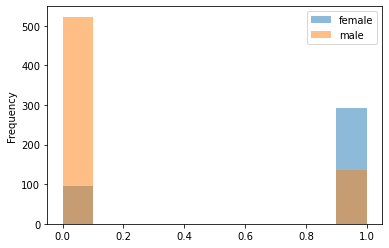

In [47]:
data[data['sex'] == 'female']['survived'].plot.hist(alpha=0.5, label='female') # pokazujemy sobie na wykresie teraz kobiety i mezczyzn przezycie
data[data['sex'] == 'male']['survived'].plot.hist(alpha=0.5, label='male')
plt.legend()

In [48]:
# zmienna age

Text(0.5, 1.0, 'Rozkłady wieku w kontekście przezywalności')

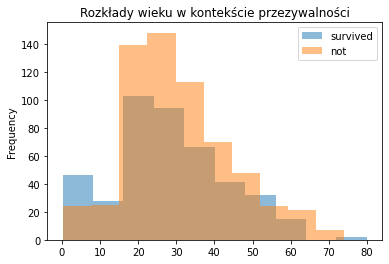

In [49]:
data[data['survived'] == 1]['age'].plot.hist(alpha=0.5, label='survived')
data[data['survived'] == 0]['age'].plot.hist(alpha=0.5, label='not')
plt.legend()
plt.title('Rozkłady wieku w kontekście przezywalności')

Text(0.5, 1.0, 'Rozkłady wieku w kontekście przezywalności dla kobiet')

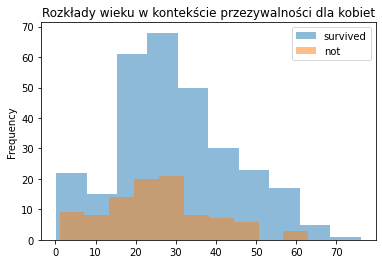

In [50]:
female_data = data[data['sex'] == 'female']
female_data[female_data['survived'] == 1]['age'].plot.hist(alpha=0.5, label='survived')
female_data[female_data['survived'] == 0]['age'].plot.hist(alpha=0.5, label='not')
plt.legend()
plt.title('Rozkłady wieku w kontekście przezywalności dla kobiet')

Text(0.5, 1.0, 'Rozkłady wieku w kontekście przezywalności dla mężczyzn')

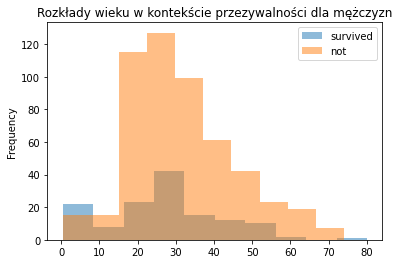

In [51]:
male_data = data[data['sex'] == 'male']
male_data[male_data['survived'] == 1]['age'].plot.hist(alpha=0.5, label='survived')
male_data[male_data['survived'] == 0]['age'].plot.hist(alpha=0.5, label='not')
plt.legend()
plt.title('Rozkłady wieku w kontekście przezywalności dla mężczyzn')

In [52]:
# zmienna sibsp - przeważają osoby same bez małżonów i rodzeństwa

In [53]:
data['sibsp'].value_counts()

0    685
1    280
2     36
4     22
3     16
5      6
8      1
Name: sibsp, dtype: int64

Text(0.5, 1.0, 'srednia przezywalność w zależności od liczny małżonków+rodzeństwa na pokładzie')

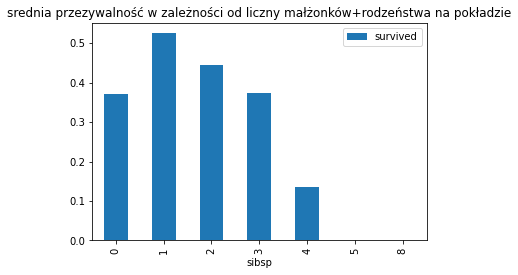

In [54]:
data.pivot_table(values='survived', index='sibsp', aggfunc='mean').plot.bar()
plt.title('srednia przezywalność w zależności od liczny małżonków+rodzeństwa na pokładzie')

In [55]:
# zmienna parch - parents children 

In [56]:
data['parch'].value_counts() # wiekszosc osob byla sama

0    768
1    160
2     97
3      8
5      6
4      5
6      2
Name: parch, dtype: int64

Text(0.5, 1.0, 'srednia przezywalność w zależności od liczny dzieci i rodzicow na pokładzie')

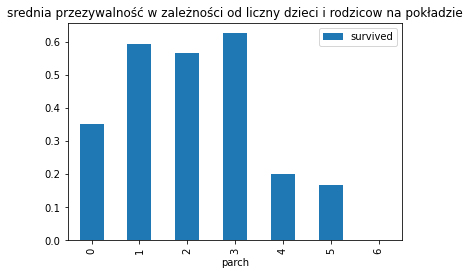

In [57]:
data.pivot_table(values='survived', index='parch', aggfunc='mean').plot.bar()
plt.title('srednia przezywalność w zależności od liczny dzieci i rodzicow na pokładzie')

In [58]:
data['relatives'] = data['parch'] + data['sibsp']   # zmienna opisujaca wszytskich człownków rodziny na pokłądzie

In [59]:
data['relatives'].value_counts()

0     590
1     206
2     144
3      39
5      25
4      17
6      16
7       8
10      1
Name: relatives, dtype: int64

Text(0.5, 1.0, 'srednia przeżywalność w zależności od liczby krewnych na pokładzie')

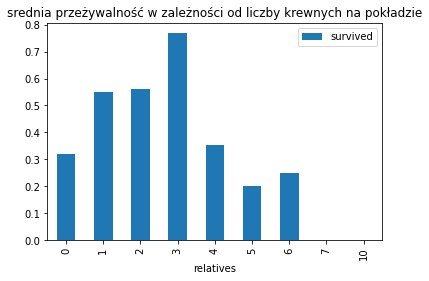

In [60]:
data.pivot_table(values='survived', index='relatives', aggfunc='mean').plot.bar()
plt.title('srednia przeżywalność w zależności od liczby krewnych na pokładzie')

In [61]:
data['with_family'] = (data['relatives'] >= 1).astype(int)  # dołożenie zmiennej binarnej czy ktoś był z kimś czy z rodziną zmieniamy rodzaj astype

Text(0.5, 1.0, 'srednia przeżywalność w zależności od liczby krewnych na pokładzie')

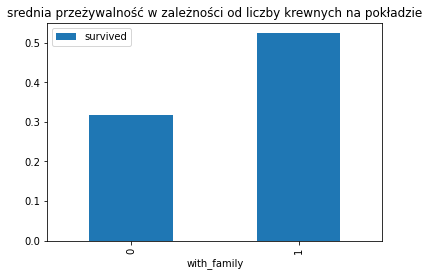

In [62]:
data.pivot_table(values='survived', index='with_family', aggfunc='mean').plot.bar()
plt.title('srednia przeżywalność w zależności od liczby krewnych na pokładzie')

In [63]:
# zmienna ticket 

In [64]:
data['ticket'].value_counts() # porzucamy zmienną = tutaj mamy kto jechał na jednym bilecie np

CA 2144          8
347082           7
S.O.C. 14879     7
347077           7
3101295          7
                ..
219533           1
315085           1
112377           1
SC/PARIS 2168    1
C.A. 31030       1
Name: ticket, Length: 732, dtype: int64

In [65]:
# zmienna fare (cena)

In [66]:
data['fare'].value_counts() # jakie kwoty biletów 

13.0000    58
26.0000    48
8.0500     38
10.5000    35
7.8958     30
           ..
45.5000     1
33.5000     1
34.6542     1
30.6958     1
6.2375      1
Name: fare, Length: 256, dtype: int64

In [67]:
data['fare_log'] = np.log(data['fare']+1)

<AxesSubplot:ylabel='Frequency'>

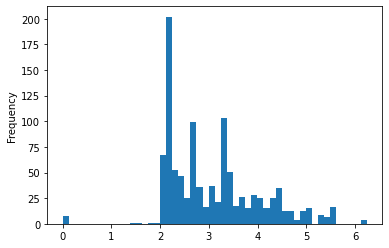

In [68]:
data['fare_log'].plot.hist(bins=50)

In [69]:
data['fare_person'] = data['fare'] / (data['relatives']+1)

<AxesSubplot:ylabel='Frequency'>

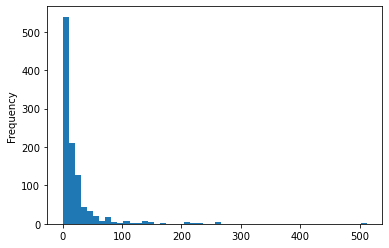

In [70]:
data['fare_person'].plot.hist(bins=50)

In [71]:
# zmienna cabin

In [72]:
data['cabin'].value_counts() # moze wyciagnac stąd pierwsze litery kabin? ale w tej postaci porzucamy zmienną 

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F4                 4
B96 B98            4
                  ..
B73                1
C111               1
C130               1
C99                1
A31                1
Name: cabin, Length: 174, dtype: int64

In [73]:
# zmienna embarked

In [74]:
data['embarked'].value_counts()

S    782
C    212
Q     50
Name: embarked, dtype: int64

Text(0.5, 1.0, 'srednia przeżywalność w zależności od portu')

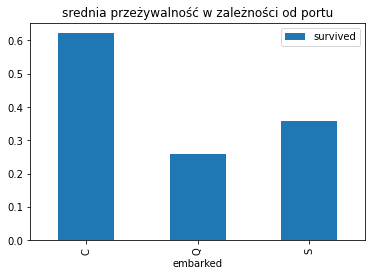

In [75]:
data.pivot_table(values='survived', index='embarked', aggfunc='mean').plot.bar()
plt.title('srednia przeżywalność w zależności od portu')

In [76]:
# zmienna home .dest = porzucamy

In [77]:
data['home.dest'].value_counts()

New York, NY                            55
London                                  14
Montreal, PQ                            10
Cornwall / Akron, OH                     9
Wiltshire, England Niagara Falls, NY     8
                                        ..
Syria Fredericksburg, VA                 1
Bennington, VT                           1
Hartford, Huntingdonshire                1
Winnipeg, MN                             1
Oslo, Norway Bayonne, NJ                 1
Name: home.dest, Length: 348, dtype: int64

In [78]:
# OBSŁUGA BRAKUJĄCYCH DANYCH 

In [79]:
data.isna().sum()

pclass           0
survived         0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             1
cabin          774
embarked         2
home.dest      361
relatives        0
with_family      0
fare_log         1
fare_person      1
dtype: int64

In [80]:
# zmienna fare 

In [81]:
data.loc[data.fare.isnull(), "fare"] = data.fare.mean()
data.loc[data.fare_log.isnull(), "fare_log"] = data.fare_log.mean()
data.loc[data.fare_person.isnull(), "fare_person"] = data.fare_person.mean()

In [82]:
data.isna().sum()

pclass           0
survived         0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin          774
embarked         2
home.dest      361
relatives        0
with_family      0
fare_log         0
fare_person      0
dtype: int64

In [83]:
data.loc[data.embarked.isnull(), "embarked"] = 'S'  # zmienna embarked i robimy żeby była na 0

In [84]:
data.isna().sum()

pclass           0
survived         0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin          774
embarked         0
home.dest      361
relatives        0
with_family      0
fare_log         0
fare_person      0
dtype: int64

In [85]:
data['cabin_unknow'] = data.cabin.isnull().astype(int)
data.drop('cabin', axis=1, inplace=True)

In [86]:
data.isna().sum()

pclass            0
survived          0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              0
embarked          0
home.dest       361
relatives         0
with_family       0
fare_log          0
fare_person       0
cabin_unknow      0
dtype: int64

In [87]:
data['dest_unknow'] = data['home.dest'].isnull().astype(int)
data.drop('home.dest', axis=1, inplace=True)

In [88]:
data.isna().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
embarked        0
relatives       0
with_family     0
fare_log        0
fare_person     0
cabin_unknow    0
dest_unknow     0
dtype: int64

In [89]:
# PRZEKSZTAŁCENIE ZMIENNYCH DO UCZENIA MODELI 

In [90]:
data.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,relatives,with_family,fare_log,fare_person,cabin_unknow,dest_unknow
0,3,0,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,S,0,0,2.145931,7.55,1,1
1,3,0,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.25,S,2,1,3.056357,6.75,1,0
2,3,0,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,S,2,1,3.056357,6.75,1,0


In [91]:
columns_to_drop = ['name', 'ticket']
data.drop(columns_to_drop, axis=1, inplace=True) # wyrzycamy kolumny których nie chcemy 

In [92]:
data.head(3)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,relatives,with_family,fare_log,fare_person,cabin_unknow,dest_unknow
0,3,0,male,42.0,0,0,7.55,S,0,0,2.145931,7.55,1,1
1,3,0,male,13.0,0,2,20.25,S,2,1,3.056357,6.75,1,0
2,3,0,male,16.0,1,1,20.25,S,2,1,3.056357,6.75,1,0


In [94]:
pclass_dummies = pd.get_dummies(data['pclass'], drop_first=True, prefix='pclass')
pclass_dummies.head(2)

,pclass_2,pclass_3
0,0,1
1,0,1


In [95]:
sex_dummies = pd.get_dummies(data['sex'], drop_first=True, prefix='sex')
sex_dummies.head(2)

,sex_male
0,1
1,1


In [96]:
sibsp_dummies = pd.get_dummies(data['sibsp'], drop_first=True, prefix='sibsp')
sibsp_dummies.head(2)

,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,sibsp_8
0,0,0,0,0,0,0
1,0,0,0,0,0,0


In [97]:
parch_dummies = pd.get_dummies(data['parch'], drop_first=True, prefix='parch')
parch_dummies.head(2)

,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6
0,0,0,0,0,0,0
1,0,1,0,0,0,0


In [98]:
embarked_dummies = pd.get_dummies(data['embarked'], drop_first=True, prefix='embarked')
embarked_dummies.head(2)

,embarked_Q,embarked_S
0,0,1
1,0,1


In [99]:
data = pd.concat([pclass_dummies, sex_dummies, sibsp_dummies, parch_dummies, embarked_dummies, data], axis=1)
data.head(2).T

,0,1
pclass_2,0,0
pclass_3,1,1
sex_male,1,1
sibsp_1,0,0
sibsp_2,0,0
sibsp_3,0,0
sibsp_4,0,0
sibsp_5,0,0
sibsp_8,0,0
parch_1,0,0


In [100]:
data.drop(['sex', 'embarked'], axis=1, inplace=True)

In [101]:
data.head(2).T

,0,1
pclass_2,0.000000,0.000000
pclass_3,1.000000,1.000000
sex_male,1.000000,1.000000
sibsp_1,0.000000,0.000000
sibsp_2,0.000000,0.000000
sibsp_3,0.000000,0.000000
sibsp_4,0.000000,0.000000
sibsp_5,0.000000,0.000000
sibsp_8,0.000000,0.000000
parch_1,0.000000,0.000000


In [102]:
y= data['survived'].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [103]:
X = data.drop('survived', axis=1, inplace=False).values
X.shape

(1046, 28)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=300, random)

NameError: name 'size' is not defined

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [108]:
models = [
    [('scaler', StandardScaler()), ('estimator', LogisticRegression())],
    [('tree', DecisionTreeClassifier())],
    [('naive_bayes', MultinomialNB())],
    [('scaler', StandardScaler()), ('estimator', SVC(kernel='rbf', probability=True))],
]
param_grid = [
    { # dla regresji logistycznej
        'estimator__C': [0.01, 0.1, 1, 10, 100]
    },
    {
        'tree__max_depth': [5, 10, 15],
        'tree__min_samples_leaf': [5, 10, 30, 50]
    },
    {},
    {
        'estimator__C': [0.01, 0.1, 1, 10, 100],
        'estimator__gamma': [0.01, 0.1, 1, 10, 100]
    }
]

In [109]:
best_models = []
for pipe, params in zip(models, param_grid):
    pipeline = Pipeline(pipe)
    gs = GridSearchCV(estimator=pipeline, param_grid=params, cv=10)
    gs.fit(X_train, y_train)
    best_models.append(gs.best_estimator_)

c:\users\basia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\basia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\basia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\basia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\naive_bayes.py", line 641, in fit
    self._count(X, Y)
  File "c:\users\basia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\naive_bayes.py", line 763, in _count
    check_non_negative(X, "MultinomialNB (input X)")
  F

ValueError: Negative values in data passed to MultinomialNB (input X)

In [ ]:
for model in best_models:
    print(accuracy_score(y_test))

## Praca Domowa
### Ćwiczenie 1: Kontytuacja badań
1. Zmodyfikuj zakresy parametrów do przeszukiwania w taki sposób, aby ich optymalne wartości nie znajdowały się na skraju zakresu.
2. Dodaj do modeli RandomForestClassifier i oszacuj istotność zmiennych (model.feature_importances_), porównaj je ze współczynnikami w regresji logistycznej i zaprezentuj w czytelnej i informatywniej formie.

### Ćwiczenie 2: Badanie cukrzyków
1. Plik "diabetes.csv", zmienną objaśnianą jest "Outcome", jeśli 1 - pacjent chory, 0 - pacjent zdrowy.
2. Obejrzyj dokładnie zbiór, zweryfikuj, czy występują jakieś wartości odstające - jeśli tak, usuń je.
3. Zastąp brakujące wartości.
4. Wybierz zmienne, które mogą okazać się istotne, ewentualnie stwórz nowe zmienne na podstawie innych (get_dummies).
5. Przetestuj poznane klasyfikatory - Regresję Logistyczną, Drzewo Decyzyjne, Naiwnego Bayesa, SVM, KNN i RandomForest.
6. Wybierz najlepszy zestaw parametrów dla każdego klasyfikatora.
7. Wybierz najlepszy z klasyfikatorów na podstawie zbioru testowego.